In [14]:
from bankmodelfactory.data.split import split_dataset
from bankmodelfactory.data.load import SourceDataLoader
from bankmodelfactory.data.split import split_dataset, split_train_valid



loader = SourceDataLoader()
data = loader.load_dataset()

data['y'] = data['y'].map({'yes': 1, 'no': 0})
summary = loader.inspect_dataset()

display(summary)
X_train, X_test, y_train, y_test = split_dataset(data)

2025-11-01 10:48:09 | INFO     | bankmodelfactory.data.load:__init__:53 - [SourceDataLoader] Configuration loaded from: /Users/surelmanda/BankModelFactory/configs/data.yaml
2025-11-01 10:48:09 | SUCCESS  | bankmodelfactory.data.load:load_dataset:85 - [SourceDataLoader] 'Bank Marketing Dataset' loaded successfully from: /Users/surelmanda/BankModelFactory/data/raw/bank-full.csv
2025-11-01 10:48:09 | INFO     | bankmodelfactory.data.load:load_dataset:86 - [SourceDataLoader] Shape: 45211 rows × 17 columns
2025-11-01 10:48:09 | INFO     | bankmodelfactory.data.load:inspect_dataset:124 - [SourceDataLoader] Inspecting dataset structure...


,Column,Type,Missing,% Missing,Cardinality,Examples
0,age,int64,0,0.0,77,"[58, 44, 33, 47, 35]"
9,day,int64,0,0.0,31,"[5, 6, 7, 8, 9]"
15,poutcome,object,0,0.0,4,"[unknown, failure, other, success]"
14,previous,int64,0,0.0,41,"[0, 3, 1, 4, 2]"
13,pdays,int64,0,0.0,559,"[-1, 151, 166, 91, 86]"
12,campaign,int64,0,0.0,48,"[1, 2, 3, 5, 4]"
11,duration,int64,0,0.0,1573,"[261, 151, 76, 92, 198]"
10,month,object,0,0.0,12,"[may, jun, jul, aug, oct, nov, dec, jan, feb, ..."
8,contact,object,0,0.0,3,"[unknown, cellular, telephone]"
1,job,object,0,0.0,12,"[management, technician, entrepreneur, blue-co..."


2025-11-01 10:48:09 | INFO     | bankmodelfactory.data.split:split_dataset:67 - [Dataset Split] YAML config → test_size=0.2, stratify=True, random_state=42
2025-11-01 10:48:09 | SUCCESS  | bankmodelfactory.data.split:split_dataset:85 - [Dataset Split] Completed. Train shape=(36168, 16), Test shape=(9043, 16)


In [15]:
from bankmodelfactory.features.feature_engineering_simple import FeatureEngineerSimple


# Transformer léger (sans enrichissement métier)
fe_basic = FeatureEngineerSimple(add_business_features=False)
X_train_basic = fe_basic.fit_transform(X_train)
X_test_basic = fe_basic.transform(X_test)

# Transformer enrichi (ajout des colonnes métier)
fe_enriched = FeatureEngineerSimple(add_business_features=True)
X_train_enriched = fe_enriched.fit_transform(X_train)
X_test_enriched = fe_enriched.transform(X_test)


In [10]:
X_test_basic.columns.tolist()

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [7]:
X_test_enriched

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1392,-0.084032,-0.134961,-0.236433,0.889995,2.285151,-0.938321,0.341489,-0.246104,-0.410910,-0.241509,...,False,False,True,False,False,False,False,False,False,True
7518,0.292371,-0.134961,-0.321816,0.889995,-0.437608,1.702145,-0.214198,-0.246104,-0.410910,-0.241509,...,False,False,True,False,False,False,False,False,False,True
12007,-0.930937,-0.134961,-0.328986,0.889995,-0.437608,0.501933,-0.117724,0.720354,-0.410910,-0.241509,...,True,False,False,False,False,False,False,False,False,True
5536,-0.460434,-0.134961,-0.231544,0.889995,-0.437608,0.861997,-0.407144,0.398202,-0.410910,-0.241509,...,False,False,True,False,False,False,False,False,False,True
29816,-0.648635,-0.134961,0.181035,0.889995,-0.437608,-1.418405,-0.762166,-0.568256,-0.410910,-0.241509,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12636,-1.401440,-0.134961,-0.553525,-1.123601,2.285151,-1.418405,1.672821,-0.568256,-0.410910,-0.241509,...,False,False,False,False,False,False,False,False,False,True
13364,0.762873,-0.134961,-0.156915,0.889995,-0.437608,-0.938321,-0.221916,0.076049,-0.410910,-0.241509,...,False,False,False,False,False,False,False,False,False,True
16102,-0.836836,-0.134961,-0.130843,0.889995,-0.437608,0.741975,0.430244,-0.246104,-0.410910,-0.241509,...,False,False,False,False,False,False,False,False,False,True
42097,-1.966043,-0.134961,-0.445003,-1.123601,-0.437608,-1.658448,-0.731295,0.398202,1.416144,1.419116,...,False,False,False,True,False,False,True,False,False,False


✅ Device in use: cpu
Epoch 1/50 | Train Loss: 0.5495 | Valid Loss: 0.4605 | Accuracy: 0.8822
Epoch 11/50 | Train Loss: 0.2219 | Valid Loss: 0.2216 | Accuracy: 0.9024
Epoch 21/50 | Train Loss: 0.2094 | Valid Loss: 0.2169 | Accuracy: 0.9013
Epoch 31/50 | Train Loss: 0.2042 | Valid Loss: 0.2125 | Accuracy: 0.9049
Epoch 41/50 | Train Loss: 0.1984 | Valid Loss: 0.2076 | Accuracy: 0.9019
Epoch 50/50 | Train Loss: 0.1957 | Valid Loss: 0.2083 | Accuracy: 0.9024


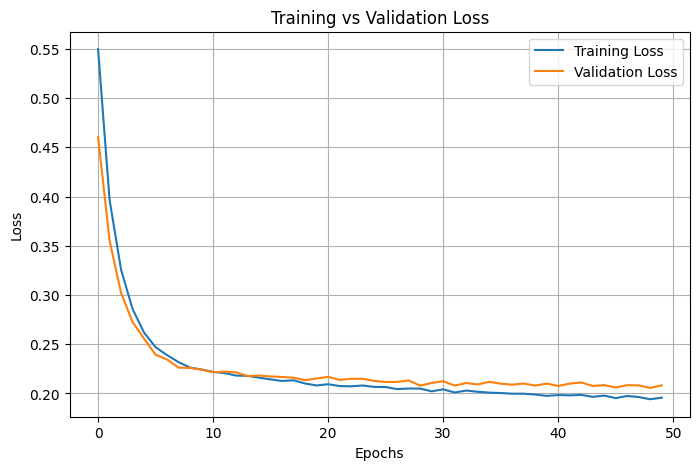

🔥 Lowest Validation Loss: 0.2057

✅ Test Set Performance:
Accuracy:  0.9072
Precision: 0.6075
Recall:    0.5851
F1-score:  0.5961

Confusion Matrix:
 [[7585  400]
 [ 439  619]]


In [18]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# ============================================
# 1. Conversion en tenseurs PyTorch
# ============================================

def to_tensor_datasets(X_train, X_test, y_train, y_test, batch_size=128):
    """
    Convertit les DataFrames transformés en tenseurs PyTorch
    et crée les DataLoader pour l'entraînement, validation, test.
    """
    # Conversion en tenseurs
    X_train_tensor = torch.tensor(X_train.values.astype(np.float32))
    X_test_tensor = torch.tensor(X_test.values.astype(np.float32))
    y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1).astype(np.float32))
    y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1).astype(np.float32))

    # Split train / validation
    X_train_t, X_valid_t, y_train_t, y_valid_t = train_test_split(
        X_train_tensor, y_train_tensor, test_size=0.1, random_state=42
    )

    # Création des DataLoaders
    train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(TensorDataset(X_valid_t, y_valid_t), batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

    return train_loader, valid_loader, test_loader, X_train_tensor.shape[1]


# Utilisation avec ton dataset enrichi :
train_loader, valid_loader, test_loader, input_dim = to_tensor_datasets(
    X_train_basic, X_test_basic, y_train, y_test, batch_size=250
)

# ============================================
# 2. Définition du modèle PyTorch
# ============================================

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"✅ Device in use: {device}")

class Classifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.dropout1(self.relu(self.bn1(self.fc1(x))))
        x = self.dropout2(self.relu(self.bn2(self.fc2(x))))
        x = self.fc3(x)
        return x


# ============================================
# 3. Fonction d'entraînement et validation
# ============================================

def train_validation(model, criterion, train_loader, valid_loader, optimizer, epochs=50):
    train_losses, valid_losses = [], []
    best_val_loss = float("inf")

    for e in range(epochs):
        # ---- Phase d'entraînement ----
        model.train()
        running_train_loss = 0.0
        for features, labels in train_loader:
            features, labels = features.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

        # ---- Phase de validation ----
        model.eval()
        running_valid_loss = 0.0
        correct_predictions = 0
        with torch.no_grad():
            for features, labels in valid_loader:
                features, labels = features.to(device), labels.to(device)
                outputs = model(features)
                loss = criterion(outputs, labels)
                running_valid_loss += loss.item()

                preds = (torch.sigmoid(outputs) > 0.5).float()
                correct_predictions += (preds == labels).float().sum()

        # ---- Suivi ----
        avg_train_loss = running_train_loss / len(train_loader)
        avg_valid_loss = running_valid_loss / len(valid_loader)
        accuracy = correct_predictions / len(valid_loader.dataset)

        train_losses.append(avg_train_loss)
        valid_losses.append(avg_valid_loss)

        # Sauvegarde du meilleur modèle
        if avg_valid_loss < best_val_loss:
            best_val_loss = avg_valid_loss
            torch.save(model.state_dict(), "best_model.pth")

        # Affichage périodique
        if e % 10 == 0 or e == epochs - 1:
            print(
                f"Epoch {e+1}/{epochs} | "
                f"Train Loss: {avg_train_loss:.4f} | "
                f"Valid Loss: {avg_valid_loss:.4f} | "
                f"Accuracy: {accuracy:.4f}"
            )

    return train_losses, valid_losses


# ============================================
# 4. Entraînement du modèle
# ============================================

model = Classifier(input_dim).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

train_losses, valid_losses = train_validation(
    model, criterion, train_loader, valid_loader, optimizer, epochs=50
)

# ============================================
# 5. Visualisation des courbes
# ============================================

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Training Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

print(f"🔥 Lowest Validation Loss: {min(valid_losses):.4f}")

# ============================================
# 6. Évaluation sur le test set
# ============================================

model.load_state_dict(torch.load("best_model.pth"))
model.eval()

all_preds, all_labels = [], []
with torch.no_grad():
    for features, labels in test_loader:
        features, labels = features.to(device), labels.to(device)
        outputs = model(features)
        preds = (torch.sigmoid(outputs) > 0.5).float()
        all_preds.append(preds.cpu())
        all_labels.append(labels.cpu())

y_pred = torch.cat(all_preds).numpy().flatten()
y_true = torch.cat(all_labels).numpy().flatten()

# Calcul des métriques
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\n✅ Test Set Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", cm)


2025-11-01 10:06:18 | INFO     | bankmodelfactory.data.load:__init__:53 - [SourceDataLoader] Configuration loaded from: /Users/surelmanda/BankModelFactory/configs/data.yaml
2025-11-01 10:06:18 | SUCCESS  | bankmodelfactory.data.load:load_dataset:85 - [SourceDataLoader] 'Bank Marketing Dataset' loaded successfully from: /Users/surelmanda/BankModelFactory/data/raw/bank-full.csv
2025-11-01 10:06:18 | INFO     | bankmodelfactory.data.load:load_dataset:86 - [SourceDataLoader] Shape: 45211 rows × 17 columns
2025-11-01 10:06:18 | INFO     | bankmodelfactory.data.load:inspect_dataset:124 - [SourceDataLoader] Inspecting dataset structure...


,Column,Type,Missing,% Missing,Cardinality,Examples
0,age,int64,0,0.0,77,"[58, 44, 33, 47, 35]"
9,day,int64,0,0.0,31,"[5, 6, 7, 8, 9]"
15,poutcome,object,0,0.0,4,"[unknown, failure, other, success]"
14,previous,int64,0,0.0,41,"[0, 3, 1, 4, 2]"
13,pdays,int64,0,0.0,559,"[-1, 151, 166, 91, 86]"
12,campaign,int64,0,0.0,48,"[1, 2, 3, 5, 4]"
11,duration,int64,0,0.0,1573,"[261, 151, 76, 92, 198]"
10,month,object,0,0.0,12,"[may, jun, jul, aug, oct, nov, dec, jan, feb, ..."
8,contact,object,0,0.0,3,"[unknown, cellular, telephone]"
1,job,object,0,0.0,12,"[management, technician, entrepreneur, blue-co..."


2025-11-01 10:06:18 | INFO     | bankmodelfactory.data.split:split_dataset:67 - [Dataset Split] YAML config → test_size=0.2, stratify=True, random_state=42
2025-11-01 10:06:18 | SUCCESS  | bankmodelfactory.data.split:split_dataset:85 - [Dataset Split] Completed. Train shape=(36168, 16), Test shape=(9043, 16)
Number of numeric features:  10
Numeric features:  ['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous']
Number of non-numeric features:  6
Non-numeric features:  ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
Total number of features:  16
Shape after one-hot encoding: (45211, 48)


,mean,std
age,1.986521e-16,1.0
default,-4.070482e-17,1.0
balance,1.760208e-17,1.0
housing,-1.647052e-16,1.0
loan,-7.370873e-17,1.0
day,4.243360e-18,1.0
duration,5.689245e-17,1.0
campaign,1.194427e-17,1.0
pdays,3.457552e-17,1.0
previous,-2.451719e-17,1.0


Device in use: cpu
Epoch 1/50 | Train Loss: 0.5259 | Val Loss: 0.3925 | Val Acc: 0.8789
Epoch 11/50 | Train Loss: 0.3587 | Val Loss: 0.3709 | Val Acc: 0.8789
Epoch 21/50 | Train Loss: 0.3584 | Val Loss: 0.3725 | Val Acc: 0.8789
Epoch 31/50 | Train Loss: 0.3571 | Val Loss: 0.3679 | Val Acc: 0.8789
Epoch 41/50 | Train Loss: 0.3555 | Val Loss: 0.3717 | Val Acc: 0.8789
Epoch 50/50 | Train Loss: 0.3548 | Val Loss: 0.3737 | Val Acc: 0.8789


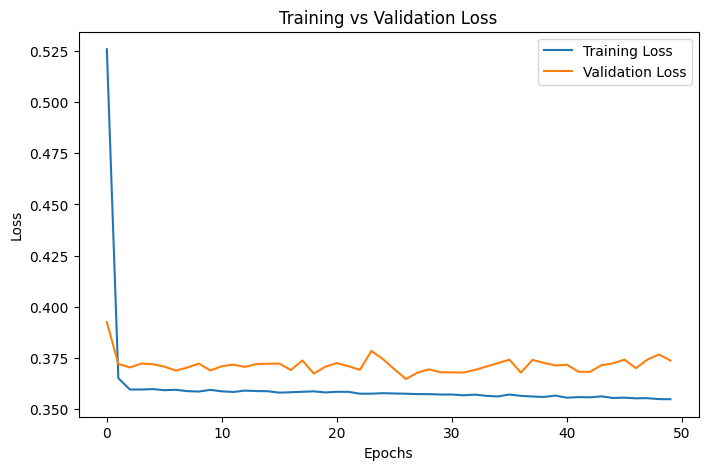

Lowest Validation Loss: 0.3647


In [17]:
# ============================================
# 1. Imports et chargement des données
# ============================================

import numpy as np
import pandas as pd
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from bankmodelfactory.data.load import SourceDataLoader
from bankmodelfactory.data.split import split_dataset

# Chargement du dataset via la factory
loader = SourceDataLoader()
data = loader.load_dataset()
summary = loader.inspect_dataset()

display(summary)

# Split global (par exemple : apprentissage / test)
X_train, X_test, y_train, y_test = split_dataset(data)

# On combine train et test pour préparer le preprocessing complet
df = pd.concat([X_train, X_test], axis=0)
df["deposit"] = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

# ============================================
# 2. Conversion des colonnes binaires
# ============================================

binary_columns = ["default", "housing", "loan", "deposit"]
for col in binary_columns:
    df[col] = df[col].map({'no': 0, 'yes': 1})

# ============================================
# 3. Split en train / test pour entraînement
# ============================================

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
test_df_copy = test_df.copy()

# Séparation des features et labels
train_labels = train_df["deposit"]
test_labels = test_df["deposit"]

train_df = train_df.drop(columns=["deposit"])
test_df = test_df.drop(columns=["deposit"])

# ============================================
# 4. One-hot encoding
# ============================================

features = pd.concat([train_df, test_df], axis=0)

numeric_features = features.select_dtypes(exclude="object").columns
non_numeric_features = features.select_dtypes(include="object").columns

print("Number of numeric features: ", len(numeric_features))
print("Numeric features: ", numeric_features.tolist())
print("Number of non-numeric features: ", len(non_numeric_features))
print("Non-numeric features: ", non_numeric_features.tolist())
print("Total number of features: ", len(features.columns))

# Encodage des variables catégorielles
features = pd.get_dummies(features, columns=non_numeric_features)
print("Shape after one-hot encoding:", features.shape)

# ============================================
# 5. Standardisation
# ============================================

features[numeric_features] = features[numeric_features].apply(lambda x: (x - x.mean()) / x.std())

Normalization_check = pd.DataFrame({
    "mean": features[numeric_features].mean(),
    "std": features[numeric_features].std()
})
display(Normalization_check)

# ============================================
# 6. Conversion en tenseurs PyTorch
# ============================================

train_features = features.iloc[:len(train_labels)]
test_features = features.iloc[len(train_labels):]

train_features = torch.tensor(train_features.values.astype(np.float32))
test_features = torch.tensor(test_features.values.astype(np.float32))

train_labels = torch.tensor(train_labels.values.reshape(-1, 1).astype(np.float32))
test_labels = torch.tensor(test_labels.values.reshape(-1, 1).astype(np.float32))

# ============================================
# 7. Split train / validation
# ============================================

(
    train_indices,
    valid_indices,
    train_features,
    valid_features,
    train_labels,
    valid_labels
) = train_test_split(
    train_df.index,
    train_features,
    train_labels,
    test_size=0.1,
    random_state=50
)

# ============================================
# 8. Création des DataLoaders
# ============================================

train_data = TensorDataset(train_features, train_labels)
valid_data = TensorDataset(valid_features, valid_labels)
test_data = TensorDataset(test_features)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

# ============================================
# 9. Définition du modèle
# ============================================

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Device in use: {device}")

class Classifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# ============================================
# 10. Fonction d'entraînement / validation
# ============================================

def train_validation(model, criterion, train_loader, valid_loader, optimizer, epochs):
    train_losses, valid_losses = [], []
    best_val_loss = float("inf")

    for e in range(epochs):
        model.train()
        total_train_loss = 0

        for features, labels in train_loader:
            features, labels = features.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        # Validation
        model.eval()
        total_valid_loss = 0
        correct_predictions = 0

        with torch.no_grad():
            for features, labels in valid_loader:
                features, labels = features.to(device), labels.to(device)
                outputs = model(features)
                loss = criterion(outputs, labels)
                total_valid_loss += loss.item()

                ps = torch.sigmoid(outputs)
                preds = (ps > 0.5).float()
                correct_predictions += (preds == labels).float().sum()

        train_loss = total_train_loss / len(train_loader)
        valid_loss = total_valid_loss / len(valid_loader)
        accuracy = correct_predictions / len(valid_loader.dataset)

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

        if valid_loss < best_val_loss:
            best_val_loss = valid_loss
            torch.save(model.state_dict(), "best_model.pth")

        if e % 10 == 0 or e == epochs - 1:
            print(
                f"Epoch {e+1}/{epochs} | Train Loss: {train_loss:.4f} | "
                f"Val Loss: {valid_loss:.4f} | Val Acc: {accuracy:.4f}"
            )

    return train_losses, valid_losses

# ============================================
# 11. Entraînement du modèle de base
# ============================================

input_dim = train_features.shape[1]
model = Classifier(input_dim).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)
epochs = 50

train_losses, valid_losses = train_validation(model, criterion, train_loader, valid_loader, optimizer, epochs)

# ============================================
# 12. Visualisation des courbes d'apprentissage
# ============================================

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Training Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

print(f"Lowest Validation Loss: {min(valid_losses):.4f}")


In [18]:
# On combine train et test pour préparer le preprocessing complet
df = pd.concat([X_train, X_test], axis=0)
df["deposit"] = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
24001,36,technician,divorced,secondary,no,861,no,no,telephone,29,aug,140,2,-1,0,unknown,no
43409,24,student,single,secondary,no,4126,no,no,cellular,5,apr,907,4,185,7,failure,no
20669,44,technician,single,secondary,no,244,yes,no,cellular,12,aug,1735,4,-1,0,unknown,yes
18810,48,unemployed,married,secondary,no,0,no,no,telephone,31,jul,35,11,-1,0,unknown,no
23130,38,technician,married,secondary,no,257,no,no,cellular,26,aug,57,10,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12636,26,blue-collar,single,secondary,no,-333,no,yes,unknown,4,jul,692,1,-1,0,unknown,no
13364,49,services,married,secondary,no,884,yes,no,telephone,8,jul,201,3,-1,0,unknown,no
16102,32,entrepreneur,married,tertiary,no,964,yes,no,cellular,22,jul,370,2,-1,0,unknown,no
42097,20,student,single,primary,no,0,no,no,cellular,2,nov,69,4,182,4,failure,no


In [ ]:
import pandas as pd
from bankmodelfactory.features.feature_engineering import FeatureEngineer 


# Initialisation du FeatureEngineer avec target encoding
fe = FeatureEngineer(encoding_strategy="frequency", target_col="y")

# Fit + transform sur train
print("=== TRAIN TRANSFORMATION ===")
X_train_transformed = fe.fit_transform(pd.concat([X_train, y_train.rename("y")], axis=1))
FeatureEngineer.check_no_categorical_columns(X_train_transformed)

# Transform sur test
print("\n=== TEST TRANSFORMATION ===")
X_test_transformed = fe.transform(pd.concat([X_test, y_test.rename("y")], axis=1))
FeatureEngineer.check_no_categorical_columns(X_test_transformed)




=== TRAIN TRANSFORMATION ===
✓ No categorical columns remaining — dataset is ready for modeling.

=== TEST TRANSFORMATION ===
✓ No categorical columns remaining — dataset is ready for modeling.


In [10]:
X_test_transformed.shape

(9043, 33)

In [11]:
# ============================================================
# 1. Separation of features and target (after preprocessing)
# ============================================================

X_train_final = X_train_transformed.drop(columns=["y"])
y_train_final = X_train_transformed["y"]

X_test_final = X_test_transformed.drop(columns=["y"])
y_test_final = X_test_transformed["y"]

# ============================================================
# 2. Internal validation split (for model tuning)
# ============================================================

# split_train_valid() returns X_train, y_train, X_valid, y_valid
X_train_split, y_train_split, X_valid_split, y_valid_split = split_train_valid(
    X_train_final,
    y_train_final,
    shuffle=True,
    random_state=42
)

# ============================================================
# 3. Shapes overview
# ============================================================

print("Training set :", X_train_split.shape, "| Target:", y_train_split.shape)
print("Validation set:", X_valid_split.shape, "| Target:", y_valid_split.shape)
print("Test set      :", X_test_final.shape, "| Target:", y_test_final.shape)


2025-11-01 09:52:21 | INFO     | bankmodelfactory.data.split:split_train_valid:153 - [split_train_valid] Completed. Total=36168, Train=25317 (70.0%), Valid=10851 (30.0%), Stratify=True, Params={'shuffle': True, 'random_state': 42}
Training set : (25317, 32) | Target: (25317,)
Validation set: (10851, 32) | Target: (10851,)
Test set      : (9043, 32) | Target: (9043,)


2025-11-01 09:56:51 | INFO     | bankmodelfactory.utils.device:get_device:39 - [DeviceManager] Using device: mps
2025-11-01 09:56:51 | INFO     | bankmodelfactory.data.bank_dataset:__init__:85 - [BankMarketingDataset] Initialized with 25317 samples and 32 features on device='mps'.
2025-11-01 09:56:51 | INFO     | bankmodelfactory.utils.device:get_device:39 - [DeviceManager] Using device: mps
2025-11-01 09:56:51 | INFO     | bankmodelfactory.data.bank_dataset:__init__:85 - [BankMarketingDataset] Initialized with 10851 samples and 32 features on device='mps'.
2025-11-01 09:56:51 | INFO     | bankmodelfactory.utils.device:get_device:39 - [DeviceManager] Using device: mps
2025-11-01 09:56:51 | INFO     | bankmodelfactory.data.bank_dataset:__init__:85 - [BankMarketingDataset] Initialized with 9043 samples and 32 features on device='mps'.
2025-11-01 09:56:51 | INFO     | bankmodelfactory.dlmodels.base_model:__init__:38 - Initialized model 'MediumNN' on device: mps
2025-11-01 09:56:51 | INFO 

2025-11-01 09:57:02 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Train] Loss: 0.3603 | AUC: 0.7439


2025-11-01 09:57:07 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Valid] Loss: 0.2884 | AUC: 0.8268
2025-11-01 09:57:07 | SUCCESS  | bankmodelfactory.training.trainer:fit:173 - New best model saved at epoch 1 → /Users/surelmanda/BankModelFactory/artifacts/models/MediumNN_2025-11-01_09-56-51_best.pt (val_loss=0.2884, val_auc=0.8268)
2025-11-01 09:57:07 | INFO     | bankmodelfactory.training.trainer:fit:150 - Epoch [2/10] -------------------


2025-11-01 09:57:18 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Train] Loss: 0.2866 | AUC: 0.8206


2025-11-01 09:57:23 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Valid] Loss: 0.2758 | AUC: 0.8407
2025-11-01 09:57:23 | SUCCESS  | bankmodelfactory.training.trainer:fit:173 - New best model saved at epoch 2 → /Users/surelmanda/BankModelFactory/artifacts/models/MediumNN_2025-11-01_09-56-51_best.pt (val_loss=0.2758, val_auc=0.8407)
2025-11-01 09:57:23 | INFO     | bankmodelfactory.training.trainer:fit:150 - Epoch [3/10] -------------------


2025-11-01 09:57:34 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Train] Loss: 0.2813 | AUC: 0.8301


2025-11-01 09:57:39 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Valid] Loss: 0.2680 | AUC: 0.8537
2025-11-01 09:57:39 | SUCCESS  | bankmodelfactory.training.trainer:fit:173 - New best model saved at epoch 3 → /Users/surelmanda/BankModelFactory/artifacts/models/MediumNN_2025-11-01_09-56-51_best.pt (val_loss=0.2680, val_auc=0.8537)
2025-11-01 09:57:39 | INFO     | bankmodelfactory.training.trainer:fit:150 - Epoch [4/10] -------------------


2025-11-01 09:57:50 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Train] Loss: 0.2745 | AUC: 0.8412


2025-11-01 09:57:55 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Valid] Loss: 0.2648 | AUC: 0.8586


2025-11-01 09:57:55 | SUCCESS  | bankmodelfactory.training.trainer:fit:173 - New best model saved at epoch 4 → /Users/surelmanda/BankModelFactory/artifacts/models/MediumNN_2025-11-01_09-56-51_best.pt (val_loss=0.2648, val_auc=0.8586)
2025-11-01 09:57:55 | INFO     | bankmodelfactory.training.trainer:fit:150 - Epoch [5/10] -------------------


2025-11-01 09:58:06 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Train] Loss: 0.2742 | AUC: 0.8432


2025-11-01 09:58:10 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Valid] Loss: 0.2643 | AUC: 0.8622
2025-11-01 09:58:10 | SUCCESS  | bankmodelfactory.training.trainer:fit:173 - New best model saved at epoch 5 → /Users/surelmanda/BankModelFactory/artifacts/models/MediumNN_2025-11-01_09-56-51_best.pt (val_loss=0.2643, val_auc=0.8622)
2025-11-01 09:58:10 | INFO     | bankmodelfactory.training.trainer:fit:150 - Epoch [6/10] -------------------


2025-11-01 09:58:22 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Train] Loss: 0.2732 | AUC: 0.8442


2025-11-01 09:58:26 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Valid] Loss: 0.2640 | AUC: 0.8646
2025-11-01 09:58:26 | SUCCESS  | bankmodelfactory.training.trainer:fit:173 - New best model saved at epoch 6 → /Users/surelmanda/BankModelFactory/artifacts/models/MediumNN_2025-11-01_09-56-51_best.pt (val_loss=0.2640, val_auc=0.8646)
2025-11-01 09:58:26 | INFO     | bankmodelfactory.training.trainer:fit:150 - Epoch [7/10] -------------------


2025-11-01 09:58:38 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Train] Loss: 0.2706 | AUC: 0.8477


2025-11-01 09:58:42 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Valid] Loss: 0.2577 | AUC: 0.8702
2025-11-01 09:58:42 | SUCCESS  | bankmodelfactory.training.trainer:fit:173 - New best model saved at epoch 7 → /Users/surelmanda/BankModelFactory/artifacts/models/MediumNN_2025-11-01_09-56-51_best.pt (val_loss=0.2577, val_auc=0.8702)
2025-11-01 09:58:42 | INFO     | bankmodelfactory.training.trainer:fit:150 - Epoch [8/10] -------------------


2025-11-01 09:58:53 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Train] Loss: 0.2688 | AUC: 0.8507


2025-11-01 09:58:58 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Valid] Loss: 0.2679 | AUC: 0.8618
2025-11-01 09:58:58 | INFO     | bankmodelfactory.training.trainer:fit:150 - Epoch [9/10] -------------------


2025-11-01 09:59:09 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Train] Loss: 0.2651 | AUC: 0.8567


2025-11-01 09:59:14 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Valid] Loss: 0.2535 | AUC: 0.8765
2025-11-01 09:59:14 | SUCCESS  | bankmodelfactory.training.trainer:fit:173 - New best model saved at epoch 9 → /Users/surelmanda/BankModelFactory/artifacts/models/MediumNN_2025-11-01_09-56-51_best.pt (val_loss=0.2535, val_auc=0.8765)
2025-11-01 09:59:14 | INFO     | bankmodelfactory.training.trainer:fit:150 - Epoch [10/10] -------------------


2025-11-01 09:59:25 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Train] Loss: 0.2619 | AUC: 0.8618


2025-11-01 09:59:30 | INFO     | bankmodelfactory.training.trainer:_run_epoch:139 - [Valid] Loss: 0.2507 | AUC: 0.8784
2025-11-01 09:59:30 | SUCCESS  | bankmodelfactory.training.trainer:fit:173 - New best model saved at epoch 10 → /Users/surelmanda/BankModelFactory/artifacts/models/MediumNN_2025-11-01_09-56-51_best.pt (val_loss=0.2507, val_auc=0.8784)
2025-11-01 09:59:30 | SUCCESS  | bankmodelfactory.training.trainer:fit:189 - Training complete.
2025-11-01 09:59:30 | INFO     | bankmodelfactory.training.trainer:fit:191 - Best validation loss: 0.2507


2025-11-01 09:59:30 | SUCCESS  | bankmodelfactory.training.trainer:_plot_training_curves:239 - Training curves saved to: /Users/surelmanda/BankModelFactory/reports/MediumNN_training_curves_2025-11-01_09-56-51.png


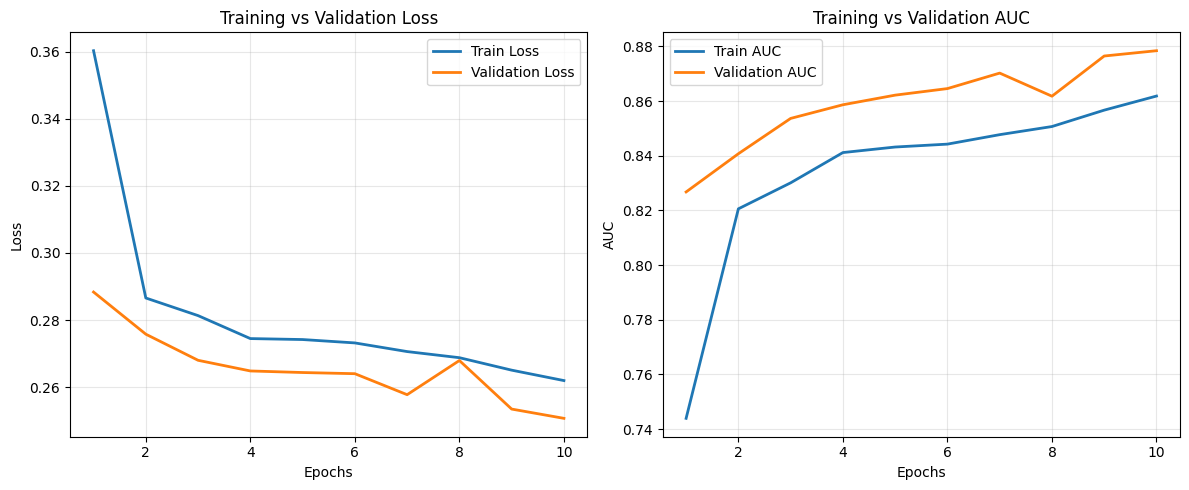

In [15]:
from torch import optim

from bankmodelfactory.dlmodels import get_model
from bankmodelfactory.training.trainer import Trainer

from torch.utils.data import DataLoader
from bankmodelfactory.data.bank_dataset import BankMarketingDataset

# -----------------------------
# 1. DataLoaders
# -----------------------------
batch_size, shuffle = 150, True

train_dataset = BankMarketingDataset(X_train_split, y_train_split)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)

valid_dataset = BankMarketingDataset(X_valid_split, y_valid_split)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=shuffle)

test_dataset = BankMarketingDataset(X_test_final, y_test_final)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)

# -----------------------------
# 2. Model and optimizer
# -----------------------------
input_dim = X_train_split.shape[1]
output_dim = 1  # binary classification
model = get_model("medium", input_dim=input_dim, output_dim=output_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# -----------------------------
# 3. Trainer and training
# -----------------------------
trainer = Trainer(model=model, optimizer=optimizer, num_epochs=10)
trainer.fit(train_loader, valid_loader)

# -----------------------------
# 4. Evaluation
# -----------------------------
#trainer.evaluate(val_loader)


In [13]:
avg_loss, auc = trainer.evaluate(valid_loader)
print(f"Validation Loss: {avg_loss:.4f} | AUC: {auc:.4f}")

2025-11-01 09:56:02 | INFO     | bankmodelfactory.training.trainer:evaluate:271 - [Evaluation] Loss: 0.2558 | AUC: 0.8713
Validation Loss: 0.2558 | AUC: 0.8713


2025-11-01 09:59:40 | INFO     | bankmodelfactory.evaluation.evaluator:__init__:78 - Evaluator initialized for model 'MediumNN' — save=ON → /Users/surelmanda/BankModelFactory/reports
2025-11-01 09:59:44 | SUCCESS  | bankmodelfactory.evaluation.evaluator:evaluate:104 - Evaluation completed — predictions generated.
2025-11-01 09:59:44 | SUCCESS  | bankmodelfactory.evaluation.evaluator:plot_confusion_roc:200 - Confusion matrix & ROC saved → /Users/surelmanda/BankModelFactory/reports/confusion_roc_MediumNN.png


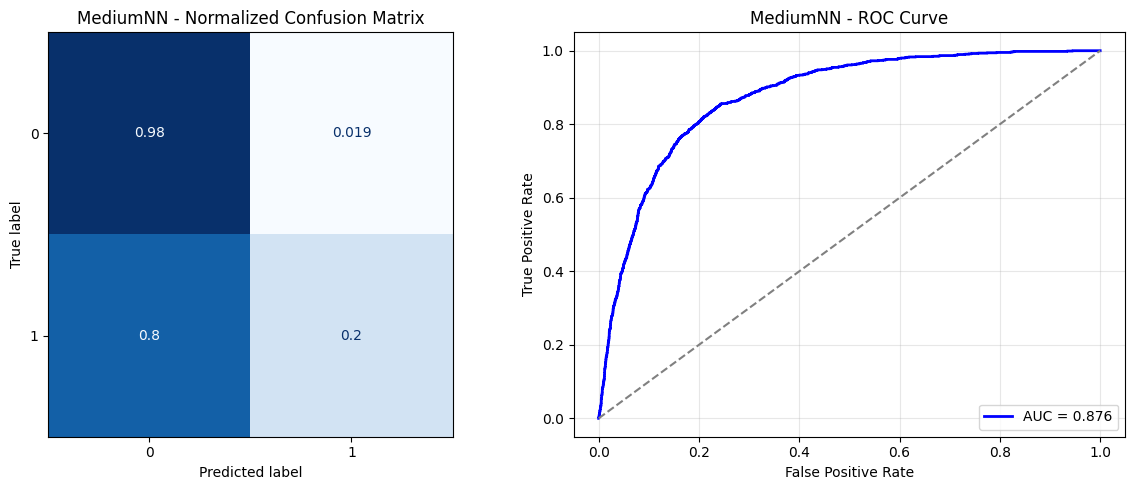

2025-11-01 09:59:44 | SUCCESS  | bankmodelfactory.evaluation.evaluator:plot_lift_curve:244 - Lift and Gains curves saved → /Users/surelmanda/BankModelFactory/reports/lift_curve_MediumNN.png


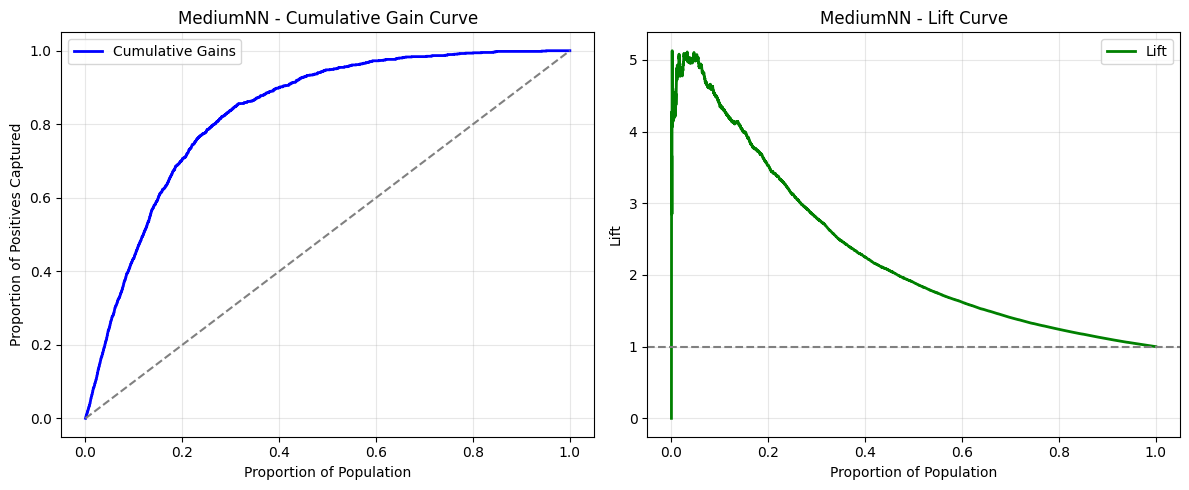

In [16]:
from bankmodelfactory.evaluation.evaluator import Evaluator
import torch

# Load best model checkpoint
#model.load_state_dict(torch.load("/Users/surelmanda/BankModelFactory/artifacts/models/SimpleNN_2025-11-01_08-10-32_best.pt"))
model = trainer.get_model()

# Create evaluator
evaluator = Evaluator(model, test_loader, save=True)  # toggle save=False to disable saving

# Run evaluation
y_true, y_pred, y_prob = evaluator.evaluate()

# Visualizations
evaluator.plot_confusion_roc()
evaluator.plot_lift_curve()


In [15]:
# Compute all metrics
metrics = evaluator.compute_metrics()
ks = evaluator.compute_ks_statistic()
lift10 = evaluator.compute_lift_at_k(0.1)
capture10 = evaluator.compute_capture_rate_at_k(0.1)
profit = evaluator.compute_expected_profit(revenue_per_tp=200, cost_per_fp=50)

2025-11-01 08:31:44 | INFO     | bankmodelfactory.evaluation.evaluator:compute_metrics:126 - Technical Metrics:


2025-11-01 08:31:44 | INFO     | bankmodelfactory.evaluation.evaluator:compute_metrics:128 -   Accuracy    : 0.8913
2025-11-01 08:31:44 | INFO     | bankmodelfactory.evaluation.evaluator:compute_metrics:128 -   Precision   : 0.5502
2025-11-01 08:31:44 | INFO     | bankmodelfactory.evaluation.evaluator:compute_metrics:128 -   Recall      : 0.3885
2025-11-01 08:31:44 | INFO     | bankmodelfactory.evaluation.evaluator:compute_metrics:128 -   F1-Score    : 0.4554
2025-11-01 08:31:44 | INFO     | bankmodelfactory.evaluation.evaluator:compute_metrics:128 -   ROC-AUC     : 0.8986
2025-11-01 08:31:44 | INFO     | bankmodelfactory.evaluation.evaluator:compute_ks_statistic:139 - KS Statistic: 0.6585
2025-11-01 08:31:44 | INFO     | bankmodelfactory.evaluation.evaluator:compute_lift_at_k:148 - Lift@10%: 4.567
2025-11-01 08:31:44 | INFO     | bankmodelfactory.evaluation.evaluator:compute_capture_rate_at_k:157 - Capture Rate@10%: 0.457
2025-11-01 08:31:44 | INFO     | bankmodelfactory.evaluation.ev

In [4]:
from torch.utils.data import DataLoader
from bankmodelfactory.utils.preview import preview_dataloader
from bankmodelfactory.data.bank_dataset import BankMarketingDataset

# ============================================================
# 1. TRAIN DATASET
# ============================================================
print("\n" + "=" * 80)
print("[1/3] Initializing TRAIN DataLoader")
print("=" * 80 + "\n")

train_dataset = BankMarketingDataset(X_train_ready, y_train_ready)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

preview_dataloader("TRAIN", train_loader, n_batches=2)


# ============================================================
# 2. VALIDATION DATASET
# ============================================================
print("\n" + "=" * 80)
print("[2/3] Initializing VALIDATION DataLoader")
print("=" * 80 + "\n")

valid_dataset = BankMarketingDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=128, shuffle=False)

preview_dataloader("VALIDATION", valid_loader, n_batches=2)


# ============================================================
# 3. TEST DATASET
# ============================================================
print("\n" + "=" * 80)
print("[3/3] Initializing TEST DataLoader")
print("=" * 80 + "\n")

test_dataset = BankMarketingDataset(X_test_ready, y_test_ready)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

preview_dataloader("TEST", test_loader, n_batches=2)


# ============================================================
# SUMMARY
# ============================================================
print("\n" + "=" * 80)
print("All DataLoaders have been successfully initialized and previewed.")
print("=" * 80 + "\n")



[1/3] Initializing TRAIN DataLoader

2025-11-01 00:37:15 | INFO     | bankmodelfactory.utils.device:get_device:39 - [DeviceManager] Using device: mps
2025-11-01 00:37:15 | INFO     | bankmodelfactory.data.bank_dataset:__init__:85 - [BankMarketingDataset] Initialized with 40689 samples and 27 features on device='mps'.

TRAIN DataLoader Preview

Batch 0
Features: shape = (128, 27)
Labels: [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] ...
--------------------------------------------------
Batch 1
Features: shape = (128, 27)
Labels: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ...
--------------------------------------------------

✔ Preview completed for TRAIN DataLoader

2025-11-01 00:37:16 | INFO     | bankmodelfactory.utils.preview:preview_dataloader:64 - [preview_dataloader] Displayed 2 batches from 'TRAIN'.

[2/3] Initializing VALIDATION DataLoader

2025-11-01 00:37:16 | INFO     | bankmodelfactory.utils.device:get_device:39 - [DeviceManager] Using device: mps
2025-11-01 

In [ ]:
from bankmodelfactory.dlmodels import get_model

input_dim = X_train_ready.shape[1]
output_dim = 1  # binary classification
model = get_model("medium", input_dim=input_dim, output_dim=output_dim)
print(model.name)
# model.save()


In [1]:
from bankmodelfactory.dlmodels import get_dl_model

# Suppose your dataset has 52 features
input_dim = X_train_ready.shape[1]
output_dim = 1  # binary classification

# Choose the model complexity: "simple", "medium", or "advanced"
model = get_dl_model("medium", input_dim, output_dim, dropout=0.3)
print(model)


ModuleNotFoundError: No module named 'bankmodelfactory.models'

In [ ]:
from bankmodelfactory.utils.config import Config

config = Config.load("configs/train.yaml")

checkpoint_path = config.train.get("checkpoint_path")
visualize = config.train.get("visualize", True)
save_plot = config.train.get("save_plot", True)
plot_path = config.train.get("plot_path")


In [22]:
##------------------------
# Data Handling
##------------------------
from pathlib import Path
from bankmodelfactory.utils.config import Config
from bankmodelfactory.utils.path import get_project_root

root = get_project_root()
config_path = Path(root / "configs" / "train.yaml")

config = Config.load({"train": str(config_path)})

cf = config.train

print(cf.get("train").get("num_epochs"))


5


In [19]:
print(config.train["train"].get("num_epochs"))


KeyError: 'train'

In [ ]:
config.get("data")

In [ ]:
from pathlib import Path
from bankmodelfactory.utils.config import Config
from bankmodelfactory.utils.path import get_project_root

root = get_project_root()
config_path = Path(root / "configs" / "train.yaml")

config = Config.load({"train": str(config_path)})

print(config.train)

print(config.train.get("num_epochs"))


{'train': {'num_epochs': 5, 'visualize': True, 'save_plot': True, 'plot_path': '/Users/surelmanda/BankModelFactory/reports', 'checkpoint_path': '/Users/surelmanda/BankModelFactory/artifacts/models/best_model.pt'}}
None

{'train': {'num_epochs': 5, 'visualize': True, 'save_plot': True, 'plot_path': '/Users/surelmanda/BankModelFactory/reports', 'checkpoint_path': '/Users/surelmanda/BankModelFactory/artifacts/models/best_model.pt'}}
None


In [ ]:
checkpoint_path: str = "artifacts/models/best_model.pt",
visualize: bool = True,
save_plot: bool = True,
plot_path: str = "/Users/surelmanda/BankModelFactory/reports",